# 군집 (Clustering)
- 데이터 포인트들을 유사한 특성을 가진 그룹끼리 묶어주는 비지도 학습 기법.

## 적용 예
- 비슷한 데이터들 분류
    - Feature를 바탕으로 비슷한 특징을 가진 데이터들을 묶어서 성향을 파악한다.
- 이상치 탐지
    - 모든 군집에 묶이지 않는 데이터는 이상치일 가능성이 높다
- 준지도학습
    - 레이블이 없는 데이터셋에 군집을 이용해 Label을 생성해 분류 지도학습을 할 수 있다. 또는 레이블을 좀더 세분화 할 수 있다.


## k-means (K-평균)
- 가장 널리 사용되는 군집 알고리즘 중 하나.
- 데이터셋을 K개의 군집으로 나눈다. K는 하이퍼파라미터로 사용자가 지정한다.
- 군집의 중심이 될 것 같은 임의의 지점(Centroid)을 선택해 해당 중심에 가장 가까운 포인드들을 선택하는 기법.


### 알고리즘 이해
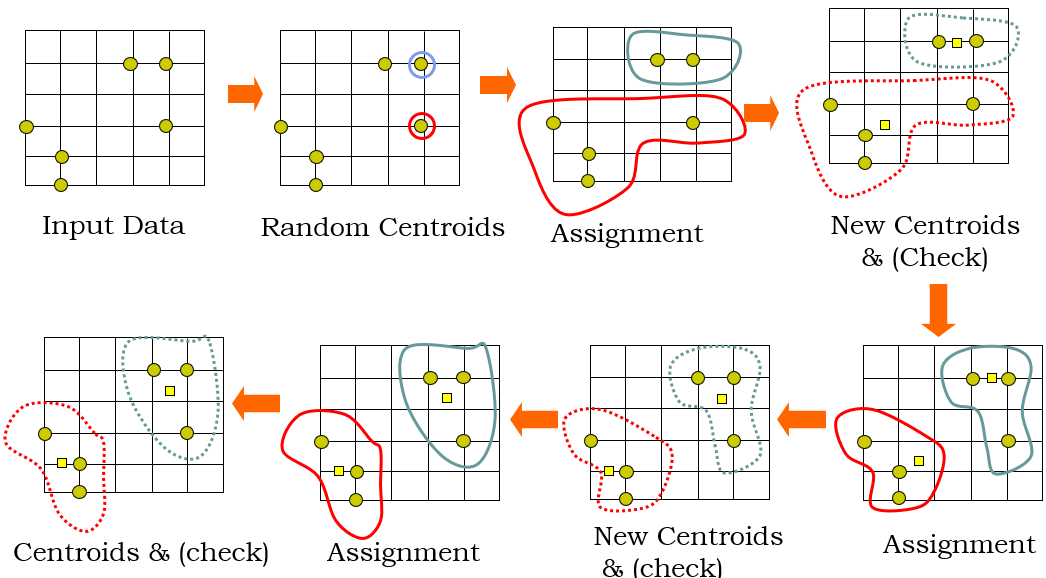

<center>출처 : http://ai-times.tistory.com/158</center>

### 특징
- K-means은 군집을 원 모양으로 간주 한다.
- 모든 특성은 동일한 Scale을 가져야 한다. 
    - **Feature Scaling 필요**
- 이상치에 취약하다.

### KMeans
- sklearn.cluster.KMeans
- 하이퍼파라미터
    - n_clusters: 몇개의 category로 분류할 지 지정.
- 속성
    - labels_ : 데이터포인트별 label

In [ ]:
import numpy as np

from sklearn.datasets import load_iris

columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
X, y = load_iris(return_X_y=True)

####  데이터전처리

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

#### KMeans 생성 및 학습

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # 몇개 군집(cluster)을 나눌지 
kmeans.fit(X_scaled) #  n_clusters 개수의 군집으로 나눔.

In [ ]:
print(X.shape, kmeans.labels_.shape)

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

In [ ]:
kmeans.labels_

In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns=columns)
df['y'] = y  #  정답
df['cluster y'] = kmeans.labels_

In [ ]:
pd.options.display.max_rows = 150
df

In [ ]:
df['cluster y'].value_counts()

#### 새로운 데이터를 분류

In [ ]:
new_data = X_scaled[100:110]

pred = kmeans.predict(new_data)  # new_data의 원소들이 어느 그룹에 포함될지 반환.
pred

## Inertia value(응집도) 를 이용한 적정 군집수 판단
- inertia 
    - 군집내 데이터들과 중심간의 거리들의 합으로 군집의 응집도를 나타내는 값이다.
    - 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다
    - KMean의 inertia_ 속성으로 조회할 수 있다.
    - 군집 단위 별로 inertia 값을 조회한 후 급격히 떨어지는 지점이 적정 군집수라 판단 할 수 있다.
        - 그룹을 많이 나눌 수록 center 에서 떨어진 것은 다른 그룹으로 묶이게 되므로 응집도가 높아진다. (inertia value값 작아짐.)
        - 그룹을 너무 많이 나누면 Inertia value 값이 작아지는 비율이 점점 낮아진다. 왜냐하면 center 중심에 가까이 있는 것들이 다시 나눠 지게 되어 거리의 합이 크게 바뀌지 않기 때문이다. 이런 경우 **나눌 필요가 없는 것을 나누었다고 볼 수 있다.**
        - **Inertia value**가 크게 바뀌지 않는 지점을 찾아 k 값으로 지정하는 것이 좋다.

In [ ]:
kmeans.inertia_

In [ ]:
k_list = [2, 3, 4, 5, 6, 7]
inertia_list = []
for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertia_list.append(model.inertia_)

In [ ]:
inertia_list

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_list, inertia_list, marker='x')
plt.grid(True, linestyle=":")
plt.show()

# 군집 평가지표

## 실루엣 점수

- 실루엣 계수 (silhouette coefficient)
    - 개별 관측치가 해당 군집 내의 데이터와 얼마나 가깝고 가장 가까운 다른 군집과 얼마나 먼지를 나타내는 지표
    - -1 ~ 1 사이의 값을 가진다. 1에 가까울 수록 좋은 지표이다. 
        - `-1`에 가까우면 잘못된 그룹에 할당되어 있다는 의미
        - `0`에 가까우면 군집의 경계에 위치한다는 의미
        - `1`에 가까우면 자신이 속한 그룹의 센터에 가까이 있다는 의미
     
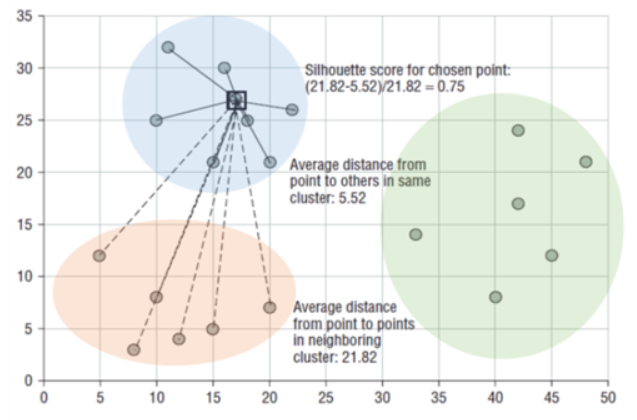

- 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산된다.

$$
s(i) = \cfrac{b(i) - a(i)}{max(a(i), b(i))}
$$

- i: i번째 원소
- s(i): i번째 원소의 실루엣 점수
- a(i): 같은 군집의 다른 데이터포인터들과의 거리평균
- b(i): 다른 군집의 데이터 포인터들과의 거리평균
- 분자: 두 군집 간의 거리 값은 b(i) - a(i)
- 분모: 이 값을(분자) 정규화 하기 위해 Max(a(i),b(i)) 값으로 나눈다


- **sklearn.metrics.silhouette_samples()**
    - 개별 관측치의 실루엣 계수 반환
- **sklearn.metrics.silhouette_score()**
    - 실루엣 계수들을의 평균
- 좋은 군집화의 지표
    - 실루엣 계수 평균이 1에 가까울수록 좋다.
    - 실루엣 계수 평균과 개별 군집의 실루엣 계수 평균의 편차가 크지 않아야 한다.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_values = silhouette_samples(X_scaled, kmeans.labels_)
print(sil_values.shape)
sil_values

In [ ]:
sil_values.mean()

In [ ]:
silhouette_score(X_scaled, kmeans.labels_)